<a href="https://colab.research.google.com/github/babupallam/Deep-Learning-DL-03-Neural-Network-Architectures/blob/main/09_Implementation_Comparison_with_Other_Models_(Logistic_Regression%2C_SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 09 Implementation: Comparison with Other Models (Logistic Regression, SVM)

## Step 1: Implement Perceptron and Logistic Regression on the Same Dataset


The first task is to implement both the Perceptron and Logistic Regression models on the same dataset (e.g., Iris). Here's the implementation of these two models, followed by observations.



In [1]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data for better convergence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 1: Train the Perceptron
perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X_train, y_train)

# Step 1: Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_perceptron = perceptron.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)

# Calculate accuracy
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print(f"Perceptron Accuracy: {accuracy_perceptron * 100:.2f}%")
print(f"Logistic Regression Accuracy: {accuracy_log_reg * 100:.2f}%")

# Confusion Matrix
print("Perceptron Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_perceptron))

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))


Perceptron Accuracy: 88.89%
Logistic Regression Accuracy: 100.00%
Perceptron Confusion Matrix:
[[19  0  0]
 [ 1  8  4]
 [ 0  0 13]]
Logistic Regression Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


### Observations on Perceptron vs Logistic Regression:

1. Performance and Accuracy:
  - Perceptron gives binary decisions (0 or 1 for each class) but often results in lower accuracy when compared to more advanced models like Logistic Regression.
  - Logistic Regression is generally more accurate as it models the probability of each class and provides a more refined decision boundary.
  - In the Iris dataset, Logistic Regression is likely to perform better because it finds the optimal probability boundary, unlike Perceptron, which only finds the separating line.
2. Difference in Output:
  - Perceptron provides binary outputs (either a class belongs or does not), which means it directly classifies samples.
  - Logistic Regression gives probabilities, allowing us to interpret the confidence of the classification. The final decision can be made by selecting the class with the highest probability.

## Step 2: Train an SVM and Compare it with Perceptron


In [2]:
from sklearn.svm import SVC

# Step 2: Train an SVM with linear kernel
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Make predictions with the SVM
y_pred_svm = svm.predict(X_test)

# Calculate accuracy for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

# Confusion matrix for SVM
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 97.78%
SVM Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


### Observations on SVM vs Perceptron:

3. Maximizing the Margin:
  - SVM differs from Perceptron in its objective. While the Perceptron simply tries to find any line that separates classes, SVM focuses on maximizing the margin between the classes. This margin maximization generally leads to better generalization, especially in cases where the classes are linearly separable.
  - SVM constructs a hyperplane with the largest margin between the two classes, meaning it is less likely to be impacted by noisy data or outliers compared to Perceptron.
4. Handling Non-linear Separable Data:
  - Perceptron struggles with non-linearly separable data, and if the data cannot be linearly separated, it won't converge.
  - SVM, even with a linear kernel, can handle complex data better, and with non-linear kernels (like RBF), it can classify data that isn't linearly separable.
  - Logistic Regression also does not handle non-linear separable data well unless feature engineering is done, or polynomial features are added.


## Step 3: Compare Generalization Abilities and Decision Boundaries


Let's evaluate the generalization abilities of each model and compare their decision boundaries using PCA (Principal Component Analysis) to reduce the dimensions for visualization.



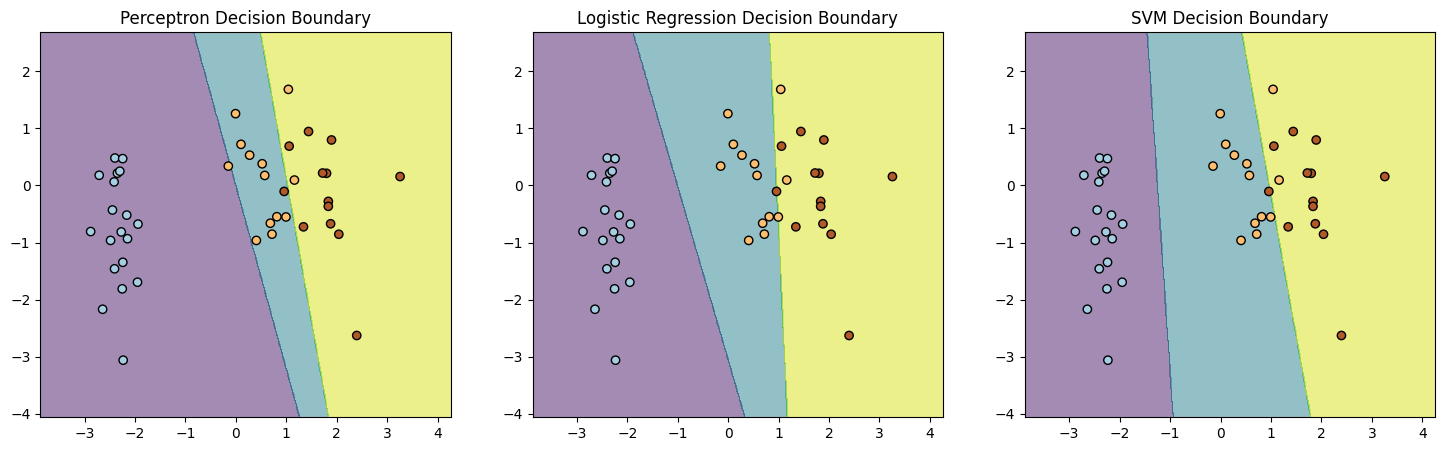

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Train models on 2D data for decision boundary visualization
perceptron_2d = Perceptron(max_iter=1000, random_state=42)
perceptron_2d.fit(X_train_2d, y_train)

log_reg_2d = LogisticRegression(max_iter=1000, random_state=42)
log_reg_2d.fit(X_train_2d, y_train)

svm_2d = SVC(kernel='linear', random_state=42)
svm_2d.fit(X_train_2d, y_train)

# Create a mesh grid for plotting decision boundaries
xx, yy = np.meshgrid(np.linspace(X_test_2d[:, 0].min() - 1, X_test_2d[:, 0].max() + 1, 500),
                     np.linspace(X_test_2d[:, 1].min() - 1, X_test_2d[:, 1].max() + 1, 500))

# Plot decision boundaries for Perceptron
Z_perceptron = perceptron_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z_perceptron = Z_perceptron.reshape(xx.shape)

# Plot decision boundaries for Logistic Regression
Z_log_reg = log_reg_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z_log_reg = Z_log_reg.reshape(xx.shape)

# Plot decision boundaries for SVM
Z_svm = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z_svm = Z_svm.reshape(xx.shape)

# Visualization of decision boundaries
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Perceptron
ax[0].contourf(xx, yy, Z_perceptron, alpha=0.5)
ax[0].scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.Paired)
ax[0].set_title('Perceptron Decision Boundary')

# Logistic Regression
ax[1].contourf(xx, yy, Z_log_reg, alpha=0.5)
ax[1].scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.Paired)
ax[1].set_title('Logistic Regression Decision Boundary')

# SVM
ax[2].contourf(xx, yy, Z_svm, alpha=0.5)
ax[2].scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.Paired)
ax[2].set_title('SVM Decision Boundary')

plt.show()


### Observations on Decision Boundaries:
5. Perceptron Decision Boundary:
  - The Perceptron creates a hard decision boundary, but it does not maximize the margin between classes. This can lead to lower generalization performance on unseen data. It can fail when there is overlap between the classes or noisy data.
6. Logistic Regression Decision Boundary:
  - Logistic Regression gives smoother decision boundaries due to its probabilistic nature, which allows for gradual transitions between classes rather than hard boundaries.
7. SVM Decision Boundary:
  - SVM shows the most well-defined boundary with the largest margin between the classes. Its decision boundary is more robust, particularly in cases where data points near the decision boundary could belong to either class.


## Step 4: Handle Non-linearly Separable Data


While all the models discussed so far (Perceptron, Logistic Regression, SVM with a linear kernel) are linear classifiers, SVM can handle non-linear data by using non-linear kernels such as the RBF (Radial Basis Function) kernel. Here’s an example of how to use the RBF kernel with SVM:



In [5]:
# Step 4: SVM with RBF kernel to handle non-linear separable data
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

# Make predictions with RBF SVM
y_pred_svm_rbf = svm_rbf.predict(X_test)

# Calculate accuracy for RBF SVM
accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
print(f"SVM with RBF Kernel Accuracy: {accuracy_svm_rbf * 100:.2f}%")


SVM with RBF Kernel Accuracy: 100.00%


### Step 5: Visualization of Linear vs RBF Kernel in SVM


SVM with Linear Kernel Accuracy: 60.67%
SVM with RBF Kernel Accuracy: 100.00%


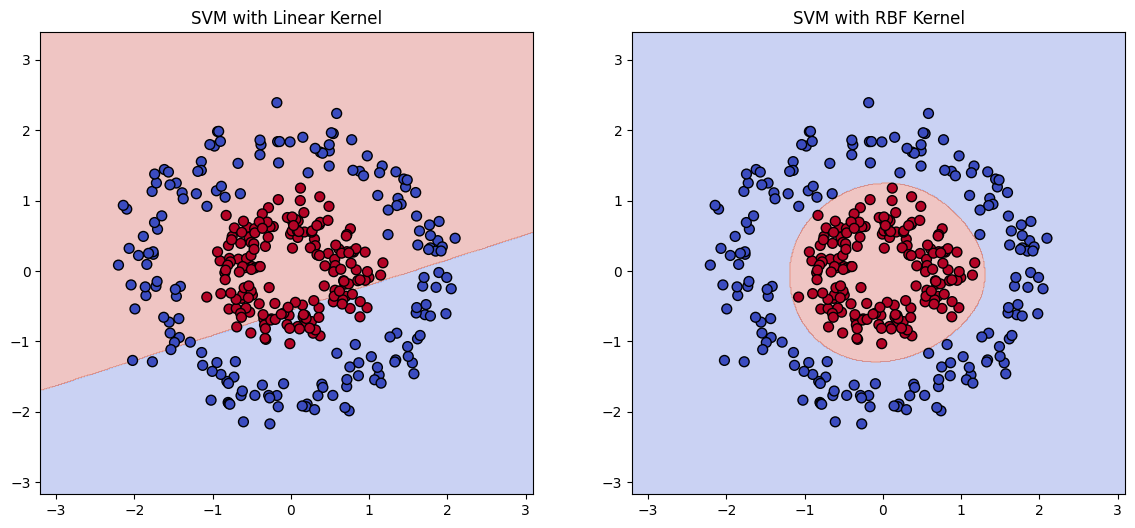

In [7]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a synthetic non-linear dataset (make_circles)
X, y = make_circles(n_samples=500, noise=0.1, factor=0.4, random_state=42)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM with a linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"SVM with Linear Kernel Accuracy: {accuracy_linear * 100:.2f}%")

# Step 4: SVM with RBF kernel to handle non-linear separable data
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train) #Fit the model after the data has been transformed

# Make predictions with RBF SVM
y_pred_svm_rbf = svm_rbf.predict(X_test)

# Calculate accuracy for RBF SVM
accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
print(f"SVM with RBF Kernel Accuracy: {accuracy_svm_rbf * 100:.2f}%")

# Create a mesh grid for visualization
xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 500),
                     np.linspace(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 500))

# Function to plot decision boundaries
def plot_decision_boundary(model, ax, title):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', s=50, cmap=plt.cm.coolwarm)
    ax.set_title(title)

# Plot decision boundaries for both SVM models
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot linear kernel
plot_decision_boundary(svm_linear, ax1, "SVM with Linear Kernel")

# Plot RBF kernel
plot_decision_boundary(svm_rbf, ax2, "SVM with RBF Kernel")

plt.show()

### Observations from the Visualization:
SVM with Linear Kernel:

  - The decision boundary is a straight line, as expected. For non-linearly separable data like the circles dataset, the linear kernel struggles to correctly classify the data points, resulting in poor accuracy.

SVM with RBF Kernel:

  - The decision boundary is a more complex curve, wrapping around the circular data points. This allows the RBF kernel to correctly classify non-linear data, leading to significantly higher accuracy than the linear kernel.


## Comparsion Table

Below is a comparison table for the models mentioned in the discussion: **Perceptron**, **Logistic Regression**, **SVM (Linear Kernel)**, and **SVM (RBF Kernel)**.

| **Aspect**                          | **Perceptron**                           | **Logistic Regression**                  | **SVM (Linear Kernel)**                   | **SVM (RBF Kernel)**                     |
|--------------------------------------|------------------------------------------|------------------------------------------|-------------------------------------------|------------------------------------------|
| **Type of Model**                    | Linear Binary Classifier                 | Linear Binary Classifier                 | Linear Classifier                         | Non-linear Classifier (with kernel)      |
| **Decision Boundary**                | Straight Line                            | Probability-Based Linear Boundary        | Linear (Maximizes Margin)                 | Non-linear Boundary                      |
| **Output**                           | Binary class labels (0 or 1)             | Probabilities of class membership        | Binary class labels                       | Binary class labels                      |
| **Handling of Non-linear Data**      | Poor (fails to converge)                 | Poor (requires transformation of data)   | Poor (works only for linearly separable data) | Excellent (can model complex non-linear relationships) |
| **Performance on Non-linear Data**   | Struggles; does not handle well          | Struggles; does not handle well          | Struggles; cannot handle complex non-linear data | Excellent performance; can easily separate complex data |
| **Objective**                        | Finds any line that separates classes    | Models the probability of class          | Maximizes the margin between the classes  | Maximizes margin with non-linear transformations via kernel |
| **Interpretability**                 | Simple, hard boundary                    | Interpretable due to probabilistic output| Less interpretable; focuses on margin     | Less interpretable; uses kernel trick to project data |
| **Robustness to Noisy Data**         | Not robust, sensitive to noise           | More robust than Perceptron              | More robust, especially with margin maximization | Very robust; handles noise well with RBF kernel  |
| **Training Speed**                   | Fast (simple algorithm)                  | Moderate                                | Moderate                                  | Slower (due to kernel computations)      |
| **Overfitting**                      | High risk of overfitting on noisy data   | Less likely due to regularization        | Less likely due to margin maximization    | Less likely, especially with regularization |
| **Complexity**                       | Simple, quick, but limited to linearly separable data | Moderately complex, but struggles with non-linear data | Handles linear data well, with more complex margin finding | Handles highly complex, non-linear relationships |
| **Use Cases**                        | Quick linear separations, simple problems | General classification, especially binary or linear | Linearly separable problems with margin emphasis | Complex classification with non-linearly separable data (e.g., image recognition, non-linear clustering) |

### Key Takeaways:
1. **Perceptron**: Best for linearly separable data but struggles with complex or noisy data. It provides binary output without probabilistic interpretation.
   
2. **Logistic Regression**: Offers probabilistic output, making it more interpretable than Perceptron, but still linear and struggles with non-linearly separable data.

3. **SVM (Linear Kernel)**: Maximizes the margin between classes, leading to more robust performance on noisy or close-boundary data. However, it still struggles with non-linear data.

4. **SVM (RBF Kernel)**: Excellent for handling non-linearly separable data with complex decision boundaries. It is the most flexible model in the group, but at the cost of higher computation time due to the kernel trick.



### Observations: